# Top Markets to Advertise

We want to figure out what specific market would be most advantageous to advertise our new Web/Mobile development courses. Ideally we would like to advertise in the top 3 markets so that we have a diverse marketing strategy. Therefore we will attempt to answer the following questions:

- How many programmers are actually interested in Web/Mobile development?
- In what country do these programmers live?
- Are these programmers willing to pay for a programming course? How much?
- What are the top 3 markets to advertise in? By how much?

# Introduction 

We are using an already made dataset from a survey conducted by freeCodeCamp, we are doing this because we know many coders start at the free coding website (FreeCodeCamp) hence they already have the market we are looking to explore. This dataset contains information about the coders like where they are located, how long they have been coding for, what their interests are all useful information for our analysis. The dataset can be found [here](https://github.com/freeCodeCamp/2017-new-coder-survey), we will start by reading and exploring the data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

new_coders_data = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)

In [2]:
new_coders_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
list(new_coders_data.columns.values)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

# Exploring Interests of Participants

Here we want to explore if there is actually a significant amount of participants that would be interested in taking a Web/Mobile development course. We will do this by looking at what the participant's job interests are.

In [4]:
# Job interest percentage 
new_coders_data["JobRoleInterest"].value_counts(normalize=True, dropna=False)*100

NaN                                                                                                                                                             61.529574
Full-Stack Web Developer                                                                                                                                         4.528198
  Front-End Web Developer                                                                                                                                        2.475928
  Data Scientist                                                                                                                                                 0.836314
Back-End Web Developer                                                                                                                                           0.781293
  Mobile Developer                                                                                                                                    

In [5]:
# Drop all the rows where participants didn't answer what role they are interested in
new_coders = new_coders_data[new_coders_data["JobRoleInterest"].notnull()].copy()

# Check that all the null values are removed
new_coders["JobRoleInterest"].value_counts(normalize=True, dropna=False)*100

Full-Stack Web Developer                                                                                                                                                            11.770595
  Front-End Web Developer                                                                                                                                                            6.435927
  Data Scientist                                                                                                                                                                     2.173913
Back-End Web Developer                                                                                                                                                               2.030892
  Mobile Developer                                                                                                                                                                   1.673341
Game Developer                                    

Note that most of the participants have multiple jobs they are interested in. Since we are only interested in participants that are interested in Web development or Mobile developement we will isolate these participants and see what percentage of the population they consist of.

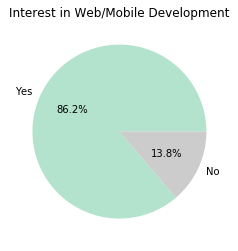

In [6]:
# Separate for web or mobile develeper only 
web_mob_dev = new_coders["JobRoleInterest"].str.contains("Web Developer|Mobile Developer")

# Evaluate their percentage
web_mob_dev_prc = web_mob_dev.value_counts(normalize=True)*100

# Plot the percentage of developers that are interested in Web/Mobile developers
web_mob_dev_prc.plot(kind="pie", labels=("Yes", "No"), colormap='Pastel2', autopct="%1.1f%%", title="Interest in Web/Mobile Development")
plt.ylabel("");

We can see that we are going to be able to extract some useful information from this survey data since over 86% of the participants who took the survey are interested in Web/Mobile Development.

# Exploring Participants Location
Now we would like to find out where the participants are living, this will point us in the right direction of where we should target our advertisements.

In [7]:
# Check out where most of the participants live
new_coders["CountryLive"].value_counts().head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

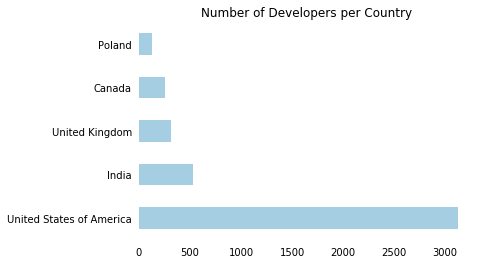

In [8]:
country_live_count = new_coders["CountryLive"].value_counts()

# Plot the top 5 countries where the participants are located
country_live_count[:5].plot(kind="barh", colormap="Paired")
plt.title("Number of Developers per Country")
plt.box(False) # Remove boarder
plt.tick_params(top=False, bottom=False, left=False, right=False) # Remove graph ticks

Based on these preliminary results we should focus our advertising efforts in the USA, Indian and UK markets. But let's continue our analyzing to see how much of these participants are willing to spend on a learning service. 

# Exploring Participants Spending

We will find out how much the participants are willing to spend on education per month and then check if the countries that we should focus on are still the same.

In [9]:
# Check how many months the participants have been programing for
new_coders["MonthsProgramming"].value_counts(dropna=False).sort_index().head()

0.0    235
1.0    767
2.0    669
3.0    637
4.0    367
Name: MonthsProgramming, dtype: int64

We notice that we have some 0.0 values since we want to ultimately calculate a per month price we will clean this up and replace the null values with 1.

In [10]:
# Replace the 0.0 values to 1.0
new_coders["MonthsProgramming"].replace(0.0, 1.0, inplace=True)

# Check the 0.0 values have been replaced
new_coders["MonthsProgramming"].value_counts().sort_index().head()

1.0    1002
2.0     669
3.0     637
4.0     367
5.0     279
Name: MonthsProgramming, dtype: int64

In [11]:
# Drop NaN values for both MonthsProgramming
new_coders = new_coders[new_coders["MonthsProgramming"].notnull()]

# Check there are no NaN values 
new_coders["MonthsProgramming"].value_counts(dropna=False).isnull().sum()

0

In [12]:
# Drop NaN values for CountryLive
new_coders = new_coders[new_coders["CountryLive"].notnull()]

# Check there are no NaN values 
new_coders["CountryLive"].value_counts(dropna=False).isnull().sum()

0

In [13]:
# Create a new column that describes the amount of money a student is willing to spend per month
new_coders["MonthlySpending"] = new_coders["MoneyForLearning"] / new_coders["MonthsProgramming"]

# Group the dataset by country 
grouped_country = new_coders.groupby("CountryLive")

top_5_pop = ["United States of America", "India", "United Kingdom", "Canada", "Poland"]

# Caculate mean monthly money willing to by spend by the top 5 countries with the highest number of developers
mean_money_by_country = grouped_country["MonthlySpending"].mean()[top_5_pop].sort_values(ascending=False)
mean_money_by_country

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
Poland                       75.678935
United Kingdom               45.534443
Name: MonthlySpending, dtype: float64

The United Kingdom seems to have a surprisingly low monthly conversely Canada's monthly spending seems a bit high, this could be because we do not have enough data points to get a true average or there are some outliers in the dataset. Let check for outliers and if there are any, remove them.

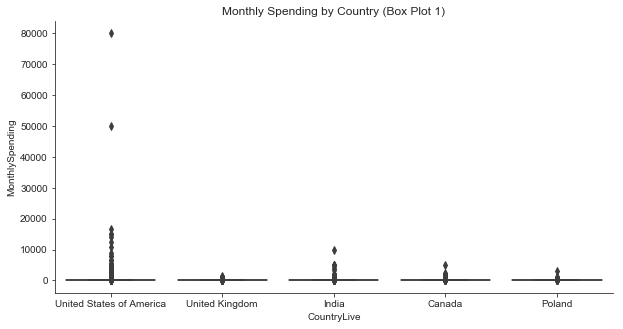

In [14]:
top_5_countries = new_coders[new_coders["CountryLive"].str.contains("United States of America|India|Canada|Poland|United Kingdom")]

# Plot a box plot to check for outliers
sns.set_style("ticks")
fig, ax = plt.subplots()
fig.set_size_inches(10, 5) # Change the figure size
sns.boxplot(data=top_5_countries, y="MonthlySpending", ax=ax, x="CountryLive")
ax.set_title("Monthly Spending by Country (Box Plot 1)")
sns.despine()

From the plot, we can see that there are some outliers in most countries. We will start to remove some of the outliers by setting a cap on the monthly spending to anything over 10K dollars.

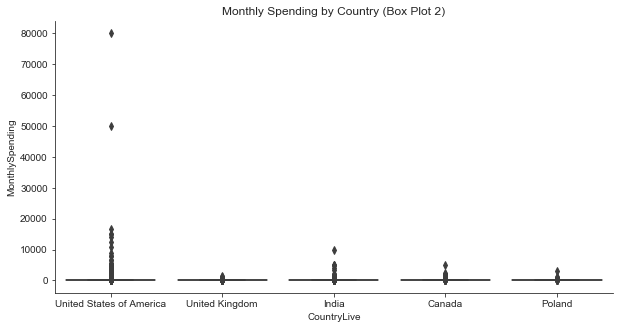

In [15]:
# Remove any value of monthly spending over 10,000
new_coders = new_coders[new_coders["MonthlySpending"]< 10000]

# Plot a sencond box plot to check for any other outliers
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.boxplot(data=top_5_countries, y="MonthlySpending", ax=ax, x="CountryLive")
ax.set_title("Monthly Spending by Country (Box Plot 2)")
sns.despine()

We still have some significant outliers left specially in countries like India, Canada, and Poland. To eliminate these we will set a cap on monthly spending for those countries to 3K.

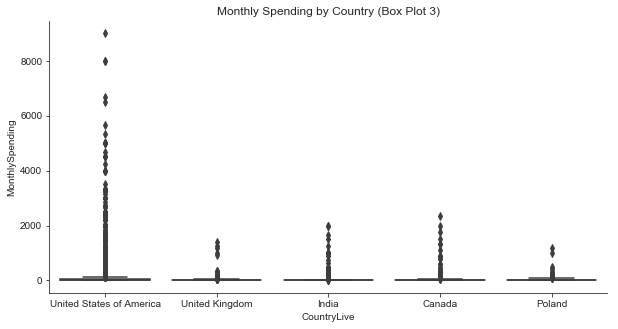

In [16]:
# Isolate the 3 countries remove the outliers and rejoin with the other 2 countries of the top 5
countries_3 = new_coders[new_coders["CountryLive"].str.contains("India|Canada|Poland")]
countries_3_cap = countries_3[countries_3["MonthlySpending"] < 3000]
uk_usa = new_coders[new_coders["CountryLive"].str.contains("United States of America|United Kingdom")]
final_5 = pd.concat([uk_usa, countries_3_cap])

# Plot a Third box plot to check that most ourliers are gone
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.boxplot(data=final_5, y="MonthlySpending", ax=ax, x="CountryLive")
ax.set_title("Monthly Spending by Country (Box Plot 3)")
sns.despine()

In [17]:
# Group the dataset by country 
final_5_grouped = final_5.groupby("CountryLive")

# Check top 5 countries to advertice in mean monthly spending 
final_5_monthly_mean = final_5_grouped["MonthlySpending"].mean().sort_values(ascending=False)
final_5_monthly_mean

CountryLive
United States of America    155.459187
Canada                       93.065400
India                        65.758763
Poland                       51.510992
United Kingdom               45.534443
Name: MonthlySpending, dtype: float64

We notice that after moving some outliers the monthly spending for India has significantly decreased and also decrease a bit for both the USA and Canada. Using this cleaned data we can start to make more accurate predictions as to where we should spend money in advertising. It is clear that we should spend our marketing efforts in the top 3 markets them being the USA, India, and Canada.

# Advertising Focus

Since we have a limited amount of resources we would like to see how we split them to get the most out of our advertisements. In this section, we will figure out what percentage of our resources should be deligated to the top 3 markets.

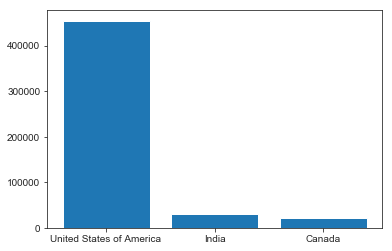

In [18]:
top_3_pop = ['United States of America', 'India', 'Canada']

market_values = {}
# Calculate the market values (mean montly spending)*(num_coders)
for country in top_3_pop:
    num_coders = len(final_5[final_5["CountryLive"]==country])
    market_values[country] = final_5_monthly_mean[country] * num_coders
    
# Plot the market values for each country
plt.bar((*zip(*market_values.items())));

From the market values, we can see that our main focus should on marketing in the USA and then a bit for in India and in Canada. We would like to know exactly how we should split our budget for marketing the Web/Mobile courses.

In [19]:
# Calculate the market share of each country
total_market = sum(market_values.values())
market_share = {}
for country in market_values:
    market_share[country] = round((market_values[country] / total_market) * 100, 1)
    
market_share

{'United States of America': 89.7, 'India': 5.9, 'Canada': 4.4}

From this market share, we know exactly how we should distribute the marketing resources giving the USA the most at 89.7% of the advertising budget, while also giving India 5.9% and Canada 4.4% of the advertising budget.

# Conclusion 

After taking a closer look at the survey conducted by freeCodeCamp we discovered the following interesting findings:

- 86.2% of the participants were interested in some sort of Web and/or Mobile development.
- Most of the participants live in the USA while some live in the UK, Canada, and India.
- On average participants from the USA are willing to pay the most for a programming course while India and Canada are willing to pay around 60% of what their USA participants are willing to pay.
- The top 3 markets to advertise are the USA, India, and Canada.

Note that these findings are not concrete more data from other sources needs to be analyzed to get a different perspective on whether or not these are really the top 3 markets to advertise Web/Mobile development courses.